In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('heart.csv')
df_filled = df.fillna(df.median()) #Filling NaN values with the column's median
df_shuffled = df_filled.sample(frac=1, random_state=100) #Shuffling the dataset to prevent bias

data = (df_shuffled.to_numpy()).astype(float) #Converting the dataframe to an array

rows = data.shape[0]
col = data.shape[1]

print(df_shuffled.head())

     age  sex  cp  restbps  chol  fbs  restecg  thalach  exang  oldpeak  \
960   52    0   2      136   196    0        0      169      0      0.1   
48    66    0   2      146   278    0        0      152      0      0.0   
886   61    1   0      120   260    0        1      140      1      3.6   
981   39    1   0      118   219    0        1      140      0      1.2   
973   51    1   2      125   245    1        0      166      0      2.4   

     slope  ca  thal  target  
960      1   0     2       1  
48       1   1     2       1  
886      1   1     3       0  
981      1   0     3       0  
973      1   0     2       1  


In [2]:
training_data = data[0:int((0.8*rows)),:] #Using 80% of the data for training

training_features = training_data[:, 0:-1] #Extracting the features
y = target = training_data[:, -1].reshape(-1, 1) #Extracting the target

#Means of features - Use these for testing as well, DO NOT recompute
means = training_features.mean(axis = 0)
stdev = training_features.std(axis = 0)
stdev[stdev == 0] = 1

X = training_features = (training_features - means)/stdev
n = X.shape[0]
features = X.shape[1]

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def relu(x):
    return np.maximum(0,x)

def relu_dev(x):
    return (x>0).astype(float)

In [3]:
np.random.seed(5)

w1 = np.random.randn(features, 8) * np.sqrt(2 / features)
b1 = np.zeros((1, 8))
w2 = np.random.randn(8, 8) * np.sqrt(2 / 8)
b2 = np.zeros((1, 8))
w3 = np.random.randn(8, 1) * np.sqrt(1 / 8)
b3 = np.zeros((1, 1))

epochs = 10000
lr = learning_rate = 0.005
losses = []
train_accuracies = []

for epoch in range(epochs):
    #Layer 1 (Input to Hidden1)
    z1 = X@w1 + b1
    a1 = relu(z1)

    #Layer 2 (Hidden1 to Hidden2)
    z2 = a1@w2 + b2
    a2 = relu(z2)

    #Layer 3 (Hidden2 to Output)
    z3 = a2@w3 + b3
    y_hat = sigmoid(z3)

    epsilon = 1e-15
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)

    preds = (y_hat >= 0.5).astype(int)
    train_accuracy = np.mean(preds == target)
    train_accuracies.append(train_accuracy)

    loss = (-1/(n))*np.sum(target*(np.log(y_hat)) + (1-target)*(np.log(1-y_hat)))
    losses.append(loss)

    #Output layer (Hidden2 to output)
    dz3 = (y_hat - target)/n
    dw3 = a2.T @ dz3
    db3 = np.sum(dz3, axis=0, keepdims=True)

    #Hidden layer (Hidden1 to Hidden2)
    da2 = dz3 @ w3.T
    dz2 = da2*relu_dev(z2)
    dw2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)

    #Input layer (Input to Hidden1)
    da1 = dz2 @ w2.T
    dz1 = da1*relu_dev(z1)
    dw1 = X.T@dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    w3 -= lr * dw3
    b3 -= lr * db3
    w2 -= lr * dw2
    b2 -= lr * db2
    w1 -= lr * dw1
    b1 -= lr * db1

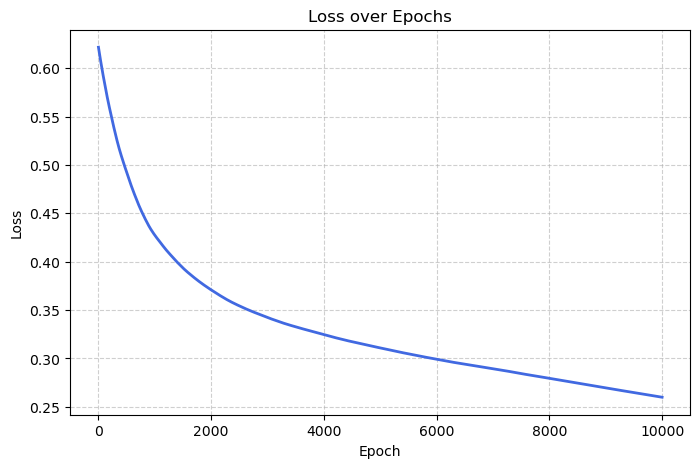

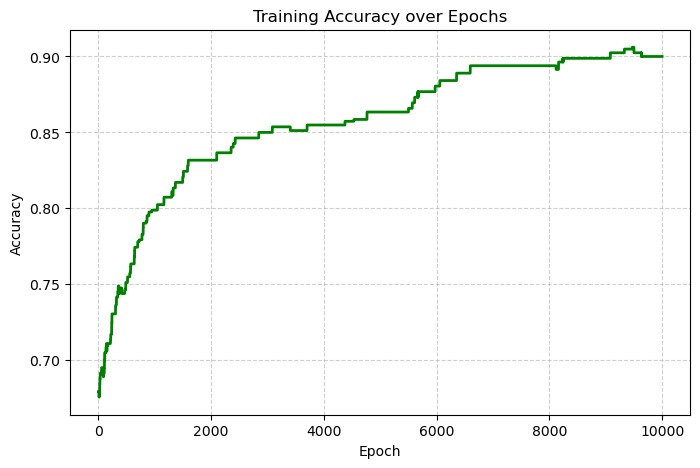

Train Accuracy: 0.9
Test Accuracy: 0.8829268292682927


In [4]:
testing_data = data[int((0.8*rows)):,:] #Using 20% of the data for testing

testing_features = testing_data[:, 0:-1] #Extracting the features
y_test = testing_target = testing_data[:, -1].reshape(-1, 1) #Extracting the target

X_test = testing_features = (testing_features - means)/stdev
n = X_test.shape[0]
features = X_test.shape[1]

z1_test = X_test @ w1 + b1
a1_test = relu(z1_test)

z2_test = a1_test @ w2 + b2
a2_test = relu(z2_test)

z3_test = a2_test @ w3 + b3
y_hat_test = sigmoid(z3_test)

plt.figure(figsize=(8, 5))
plt.plot(range(epochs), losses, linewidth=2, color='royalblue')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(range(epochs), train_accuracies, color='green', linewidth=2)
plt.title("Training Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Accuracy
predictions = (y_hat >= 0.5).astype(int)
accuracy = np.mean(predictions == y)
print("Train Accuracy:", accuracy)

# Accuracy
predictions = (y_hat_test >= 0.5).astype(int)
accuracy = np.mean(predictions == y_test)
print("Test Accuracy:", accuracy)